# Mall Customers Segmentation

## **Introduction**:

Customer segmentation is a fundamental strategy in understanding customer behavior. It involves dividing customers into groups based on their characteristics, helping businesses to develop targeted marketing strategies.

In this project, we aim to use the `k-means clustering algorithm` to group customers based on their **Annual Income** and **Spending Score** using the **Mall_Customers** dataset.


### Why Customer Segmentation?
1. Identify target customer groups.
2. Develop customized marketing campaigns.
3. Allocate resources more effectively.
4. Improve product placement and pricing strategies.

## **Objectives**

1. Perform exploratory data analysis (EDA) and visualize key attributes in the dataset.
2. Use the k-means clustering algorithm to segment customers based on:
   - Annual Income
   - Spending Score
3. Identify the optimal number of clusters using the Elbow Method.
4. Evaluate and improve clustering results through data preparation.
5. Provide actionable insights for business use.

## **Data Preparation and Visualization**

### **Step 1: Import Libraries**
The following libraries will be used for data manipulation, visualization, and modeling.

In [21]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
from scipy.stats import zscore

### **Step 2: Load the Dataset**
We will load the `Mall_Customers.csv` dataset and inspect its structure.

In [27]:
# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Display the first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### **Step 3: Exploratory Data Analysis (EDA)**
We will explore the key attributes, including their distributions.


In [4]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


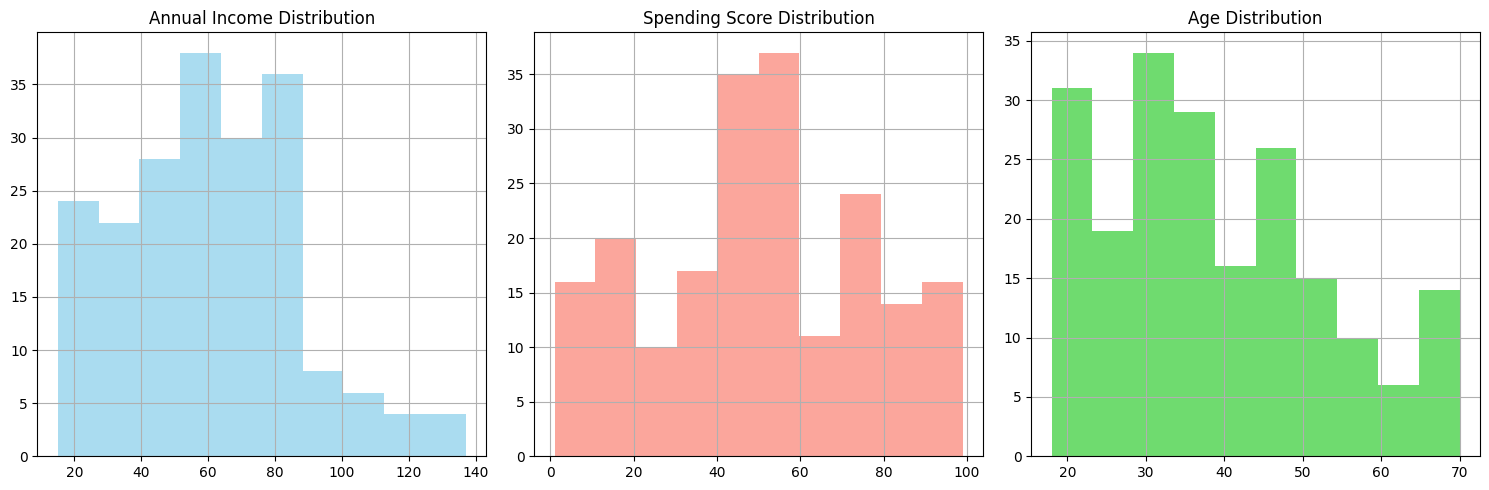

In [5]:
# Visualize feature distributions horizontally
sb.set_palette('muted')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns
df.hist(column='Annual Income (k$)', bins=10, ax=axes[0], color='skyblue', alpha=0.7)
df.hist(column='Spending Score (1-100)', bins=10, ax=axes[1], color='salmon', alpha=0.7)
df.hist(column='Age', bins=10, ax=axes[2], color='limegreen', alpha=0.7)

# Add titles
axes[0].set_title('Annual Income Distribution')
axes[1].set_title('Spending Score Distribution')
axes[2].set_title('Age Distribution')

# Adjust spacing
plt.tight_layout()
plt.show()


### **Step 4: Check for duplicates**

In [6]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


### **Step 5: Outliers Detection**
Outliers can significantly impact the results of clustering algorithms. We use boxplots to visualize potential outliers in the `Annual Income`, `Spending Score`, and `Age` features.

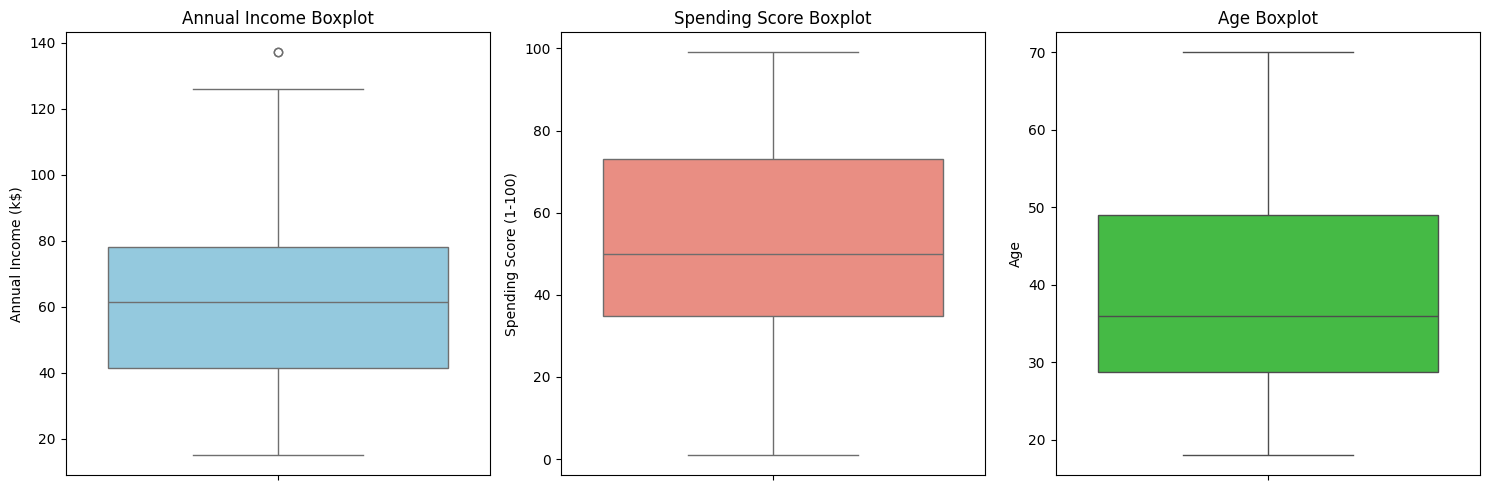

In [7]:
# Visualize outliers using boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

sb.boxplot(y='Annual Income (k$)', data=df, ax=axes[0], color='skyblue')
axes[0].set_title('Annual Income Boxplot')

sb.boxplot(y='Spending Score (1-100)', data=df, ax=axes[1], color='salmon')
axes[1].set_title('Spending Score Boxplot')

sb.boxplot(y='Age', data=df, ax=axes[2], color='limegreen')
axes[2].set_title('Age Boxplot')

# Adjust spacing
plt.tight_layout()
plt.show()

In [28]:
# Calculate Z-scores for the selected features
df['Annual Income Z-score'] = zscore(df['Annual Income (k$)'])
df['Spending Score Z-score'] = zscore(df['Spending Score (1-100)'])

# Identify outliers
outliers_income = df[(df['Annual Income Z-score'] > 3) | (df['Annual Income Z-score'] < -3)]
outliers_spending = df[(df['Spending Score Z-score'] > 3) | (df['Spending Score Z-score'] < -3)]

# Combine outliers
outliers = pd.concat([outliers_income, outliers_spending]).drop_duplicates()

print(f"Number of outliers detected: {len(outliers)}")
print("Outliers:")
print(outliers)

Number of outliers detected: 0
Outliers:
Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100), Annual Income Z-score, Spending Score Z-score]
Index: []


### **Step 6: Check for Missing Values**

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### **Step 7: Additional EDA Insights**

Correlation matrix:
                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


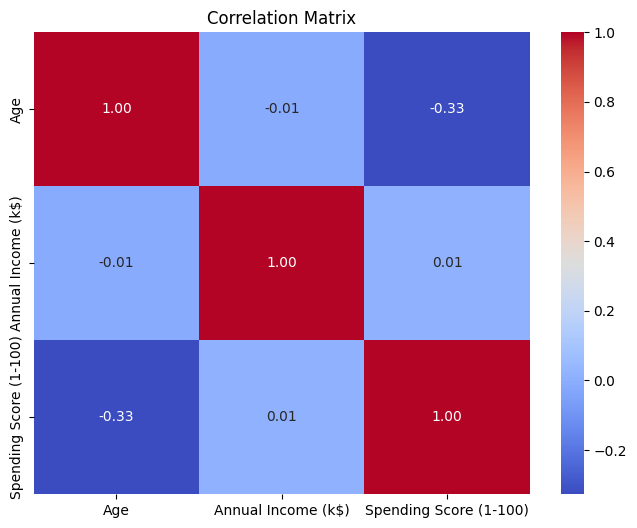

In [9]:
# Check correlations between numerical features
correlation = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
print("Correlation matrix:")
print(correlation)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sb.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## **Data Cleaning and Preparation**

This section focuses on cleaning the data, selecting relevant features, scaling the features, and exporting intermediate datasets for reproducibility.

### **Step 1: Drop Irrelevant Features**

Some features, like `CustomerID`, do not contribute to customer segmentation and are irrelevant for our analysis. We will drop such columns to simplify the dataset.

In [10]:
# Drop irrelevant columns
df_cleaned = df.drop('CustomerID', axis=1)

# Save intermediate dataset
df_cleaned.to_csv("Mall_Customers_Cleaned.csv", index=False)

# Display the first 5 rows
df_cleaned.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### **Step 2: Feature Selection**

Before scaling, we need to select the relevant features for clustering. In this case, we are only interested in `Annual Income (k$)` and `Spending Score (1-100)` because:
- **Annual Income** reflects the customer's purchasing power.
- **Spending Score** indicates how much a customer is likely to spend.

These two features will help us segment customers based on their financial behavior.

In [12]:
df = pd.read_csv("Mall_Customers_Cleaned.csv")

# Select only the relevant features
df_selected = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Save the selected dataset to a new CSV file
df_selected.to_csv("Mall_Customers_SelectedFeatures.csv", index=False)

# Display the first 5 rows of the selected dataset
df_selected.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### **Step 3: Feature Scaling**

In [29]:
df = pd.read_csv("Mall_Customers_SelectedFeatures.csv")

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
df_scaled = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

# Save the scaled dataset
df_scaled.to_csv("Mall_Customers_Scaled.csv", index=False)

# Display the first 5 rows of the scaled dataset
df_scaled.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


## **Model Building**

### **Step 1: Determine the Optimal Number of Clusters (Elbow Method)**

To determine the optimal number of clusters, we will use the Elbow Method. This involves running k-means clustering for a range of cluster numbers and plotting the Within-Cluster-Sum of Squared Errors (WCSS) against the number of clusters.

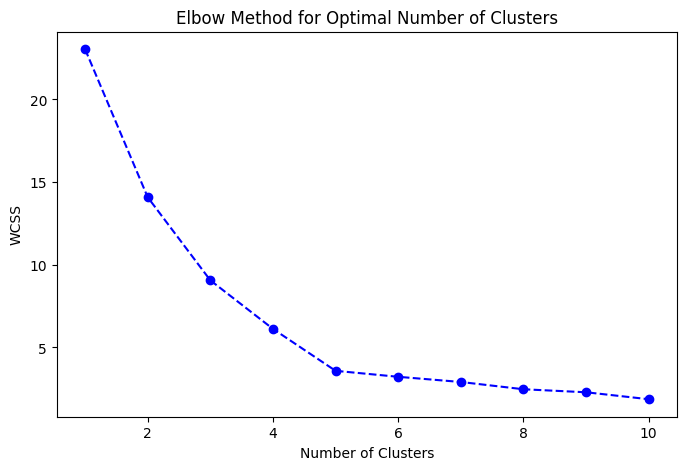

In [30]:
df = pd.read_csv("Mall_Customers_Scaled.csv")

# Initialize a list to store WCSS values
wcss = []

# Define the range of clusters to test
cluster_range = range(1, 11)

# Calculate WCSS for each number of clusters
for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### **Step 2: Perform K-Means Clustering**

Based on the Elbow Method, we will select the optimal number of clusters and perform k-means clustering.

In [31]:
# Choose the optimal number of clusters
optimal_clusters = 5

# Perform k-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Save the clustered dataset
df_scaled.to_csv("Mall_Customers_Clustered.csv", index=False)

# Display the first 5 rows of the clustered dataset
df_scaled.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,0.000000,0.387755,4
1,0.000000,0.816327,2
2,0.008197,0.051020,4
3,0.008197,0.775510,2
4,0.016393,0.397959,4


### **Step 3: Visualize the Clusters**

We will visualize the clusters using a scatter plot to understand the distribution of customers based on their Annual Income and Spending Score.

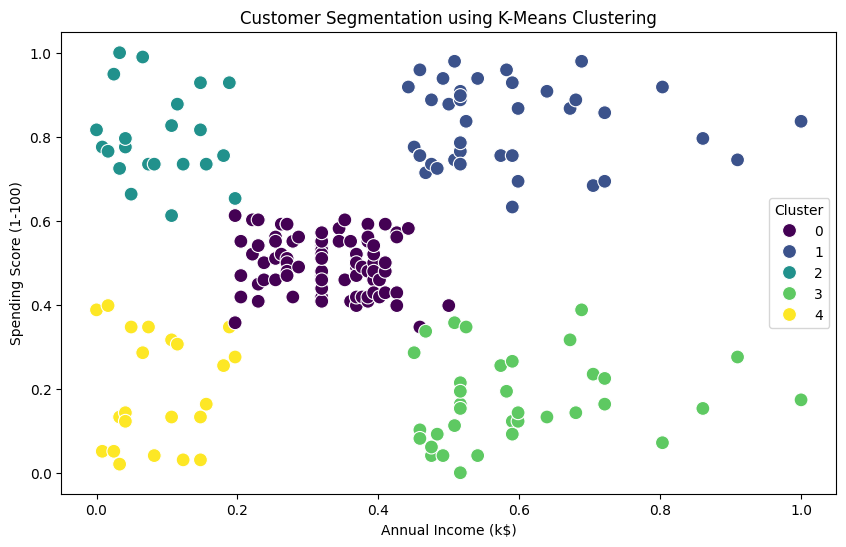

In [32]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sb.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df_scaled, palette='viridis', s=100)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

## **Model Evaluation and Conclusion**

### **Step 1: Evaluate the Clustering Results**

After performing k-means clustering, it's essential to evaluate the quality of the clusters. While k-means does not have a definitive evaluation metric like supervised learning models, we can use the following approaches to assess the clustering results:

    1. Cluster Interpretation: Analyze the characteristics of each cluster to understand the customer segments.

    2. Silhouette Score: Measure how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters.

    3. Cluster Size: Check the distribution of customers across clusters to ensure no cluster is too small or too large.

### **Cluster Interpretation**

Let's analyze the mean values of Annual Income and Spending Score for each cluster to understand the customer segments.

In [33]:
# Calculate the mean values for each cluster
cluster_summary = df_scaled.groupby('Cluster').mean()
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                  0.326958                0.495339
1                  0.586381                0.827839
2                  0.087928                0.799629
3                  0.596311                0.169218
4                  0.087928                0.196197


#### Cluster Summary

    Cluster 0:

        Annual Income (k$): 0.327 (Medium-Low Income)

        Spending Score (1-100): 0.495 (Medium Spending Score)

        Insight: Customers in this cluster have moderate income and moderate spending habits.

        Recommendation: Target them with mid-range products and promotions to encourage consistent spending.

    Cluster 1:

        Annual Income (k$): 0.586 (High Income)

        Spending Score (1-100): 0.828 (High Spending Score)

        Insight: These are high-income customers who spend generously.

        Recommendation: Offer premium products, exclusive deals, and VIP services to retain and upsell to them.

    Cluster 2:

        Annual Income (k$): 0.088 (Low Income)

        Spending Score (1-100): 0.800 (High Spending Score)

        Insight: These customers have low income but are willing to spend significantly.

        Recommendation: Provide financing options, discounts, or installment plans to facilitate their spending.

    Cluster 3:

        Annual Income (k$): 0.596 (High Income)

        Spending Score (1-100): 0.169 (Low Spending Score)

        Insight: These are high-income customers who are not spending much.

        Recommendation: Use personalized marketing campaigns to understand their preferences and encourage higher spending.

    Cluster 4:

        Annual Income (k$): 0.088 (Low Income)

        Spending Score (1-100): 0.196 (Low Spending Score)

        Insight: These customers have limited income and are not spending much.

        Recommendation: Focus on budget-friendly offers and discounts to attract them and increase their spending.

### **Silhouette Score**

The silhouette score ranges from -1 to 1, where:

    A score close to 1 indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters.

    A score close to 0 indicates overlapping clusters.

    A negative score indicates that the object may have been assigned to the wrong cluster.

In [34]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(df_scaled[['Annual Income (k$)', 'Spending Score (1-100)']], df_scaled['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.56


### **Cluster Size**

In [35]:
# Count the number of customers in each cluster
cluster_sizes = df_scaled['Cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)

Cluster Sizes:
Cluster
0    81
1    39
3    36
4    22
2    22
Name: count, dtype: int64


### **Step 2: Conclusion**

Through this project, we successfully segmented mall customers into five distinct groups based on their Annual Income and Spending Score using the k-means clustering algorithm. The Elbow Method helped us determine the optimal number of clusters, and the silhouette score confirmed the quality of the clustering.

**Key Takeaways**:

    Customer segmentation enables businesses to tailor marketing strategies to specific customer groups.

    High-income customers with low spending scores represent an untapped opportunity for personalized marketing.

    Low-income customers with high spending scores can be targeted with financing options to boost sales.

    The clustering results provide actionable insights for improving customer engagement and revenue generation.

**Future Work**:

    Incorporate Additional Features: Include other features to create more nuanced customer segments.

    Advanced Clustering Techniques: Experiment with other clustering algorithms like DBSCAN or hierarchical clustering to compare results.

    Real-Time Segmentation: Implement real-time customer segmentation for dynamic marketing strategies.